# Eigenvalues analysis

In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from isingchat import style
from isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json
from rich.pretty import pprint

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


## Getting data

In [22]:
p=1.0
nv=13
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\eigens\\regular\\infinite-size\\centrosym\\p_{}'.format(p)).resolve()
file = 'p-{}_nv-{}_h-0_inv-temp_eig-{}.yml'.format(p,nv,2**nv)
# data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\test').resolve()
# file = 'p-2.0_nv-3_h-0.yml'.format(p)
config_file = Path(os.path.join(data_path,file)).resolve()
eigens_file = config_file.with_suffix(".eigenvalues.h5")
# eigens_file = config_file.with_suffix(".free-energy.h5")
with h5py.File(eigens_file) as h5fp:
    data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
#     pprint(h5fp['eigens'].keys())
#     pprint(h5fp['eigens']['max-w-matrix'][:])
#     pprint(h5fp['eigens']['eigenvalues'][:])
#     pprint(h5fp['eigens']['eigenvectors'][:])
with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)
temp = config_data["system"]["inv_temperature"]
mag_field = config_data["system"]["magnetic_field"]

OSError: Unable to open file (truncated file: eof = 20498006016, sblock->base_addr = 0, stored_eof = 68727871544)

In [17]:
len(temp)

64

In [8]:
pprint(temp)
pprint(mag_field)
data_eigenvalues[:]

array([[[ 1.00000000e+000+0.00000000e+00j,
          0.00000000e+000+0.00000000e+00j,
          0.00000000e+000+0.00000000e+00j, ...,
          0.00000000e+000+0.00000000e+00j,
          0.00000000e+000+0.00000000e+00j,
          0.00000000e+000+0.00000000e+00j]],

       [[ 1.00000000e+000+0.00000000e+00j,
          9.25757660e-045+0.00000000e+00j,
          6.90265186e-045+4.90371292e-45j, ...,
         -3.74434857e-107+0.00000000e+00j,
          1.35669193e-108+0.00000000e+00j,
          1.64488239e-110+0.00000000e+00j]],

       [[ 1.00000000e+000+0.00000000e+00j,
         -7.43427235e-024+2.18311036e-24j,
         -7.43427235e-024-2.18311036e-24j, ...,
         -2.99774044e-080+0.00000000e+00j,
          7.70420668e-083+0.00000000e+00j,
         -8.39133361e-081+0.00000000e+00j]],

       ...,

       [[ 1.00000000e+000+0.00000000e+00j,
          1.00000000e+000+0.00000000e+00j,
          1.51757587e-001+0.00000000e+00j, ...,
         -1.52327773e-004-1.10408378e-03j,
         -1.

## Plotting eigenvalues

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


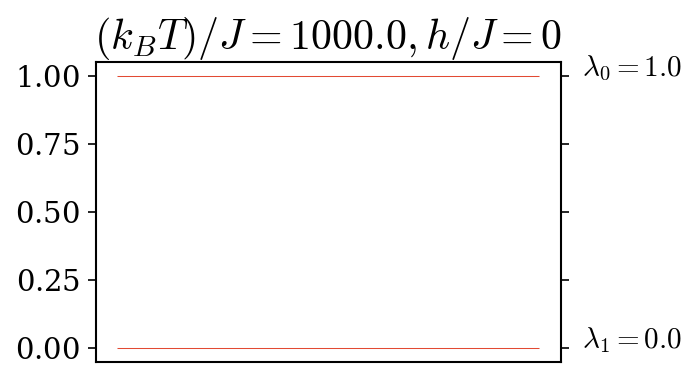

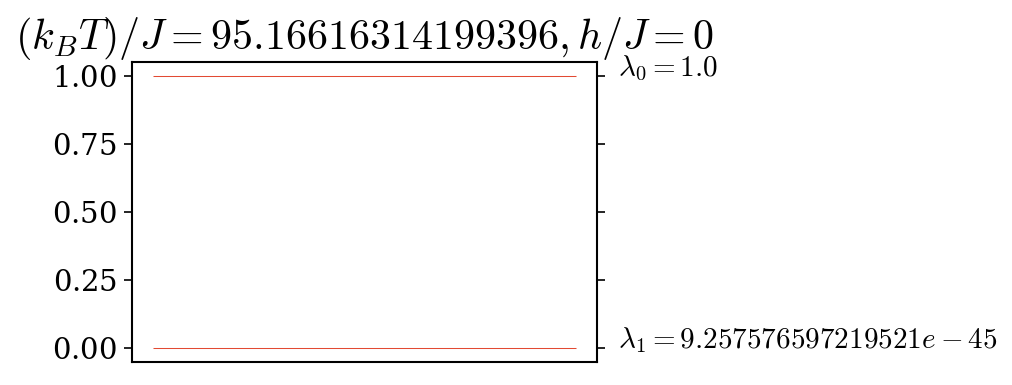

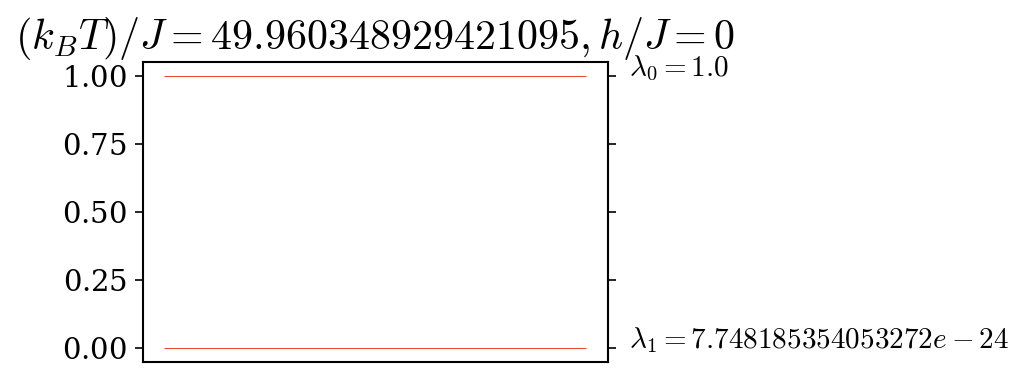

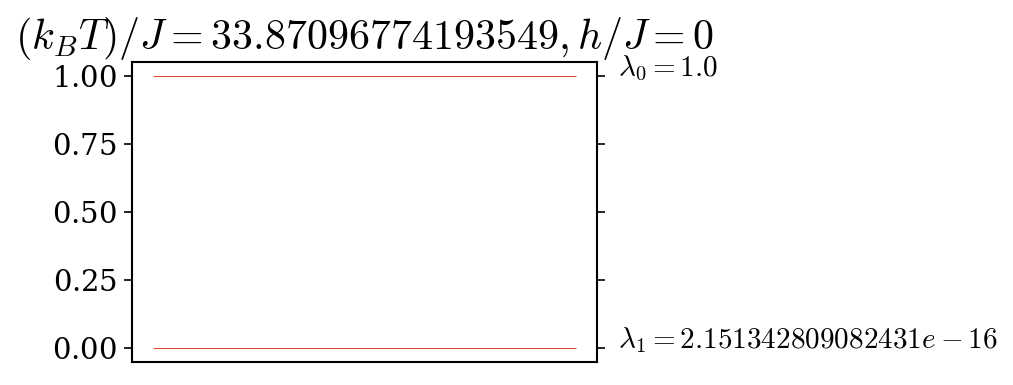

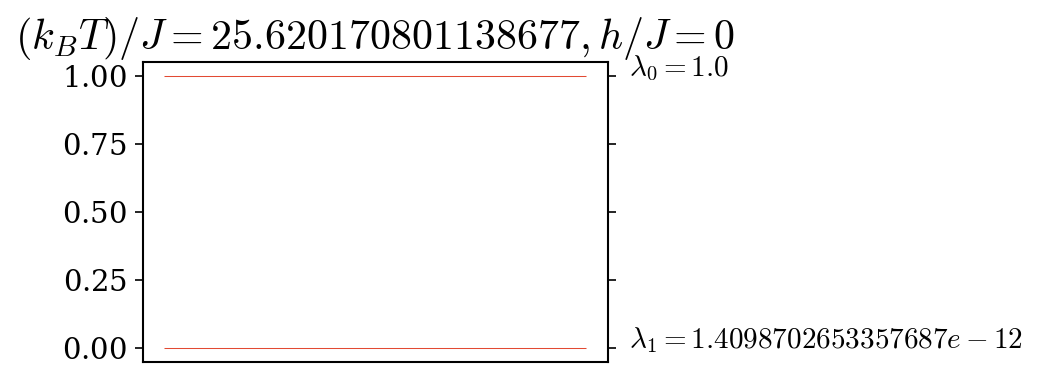

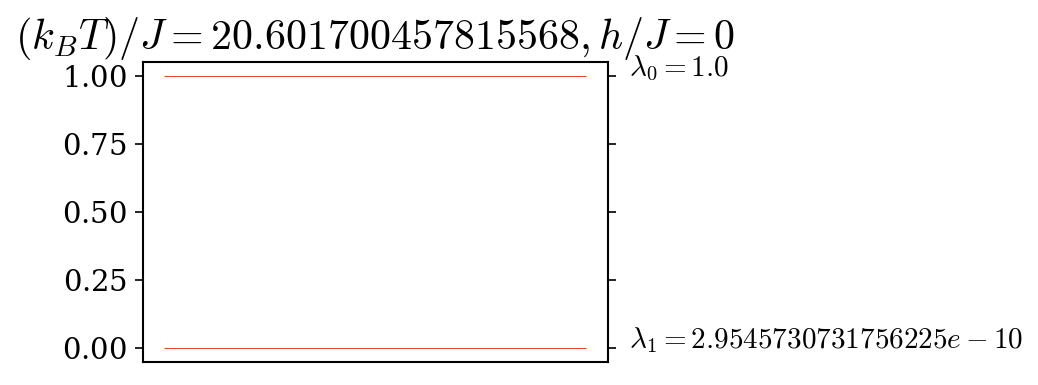

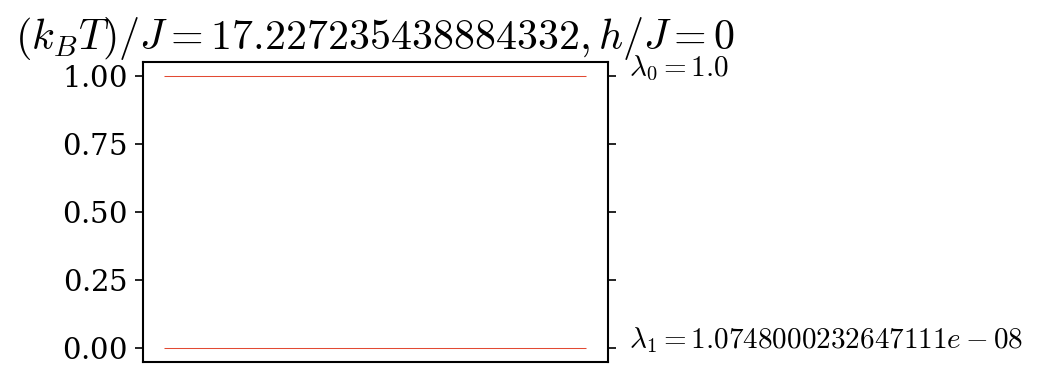

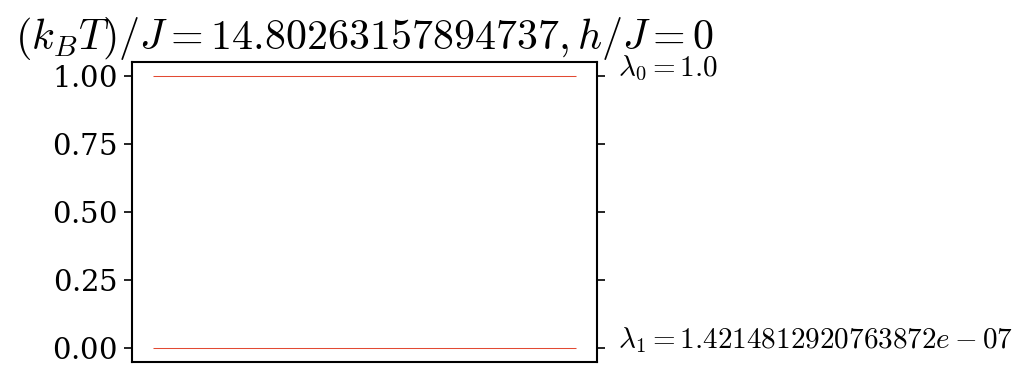

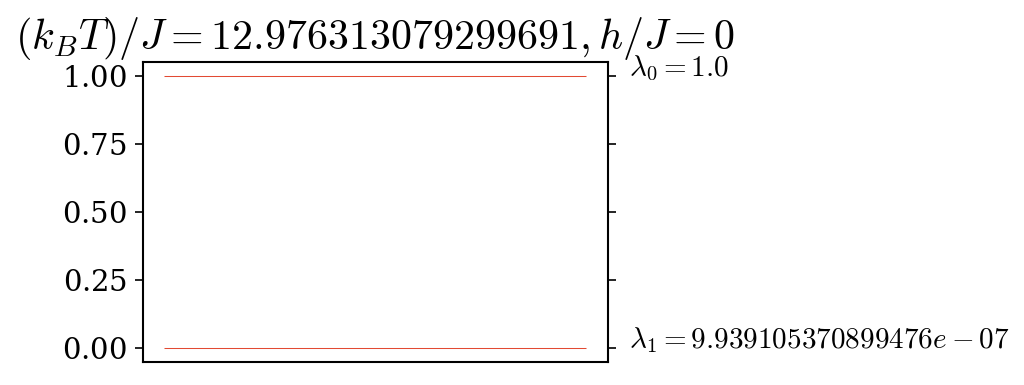

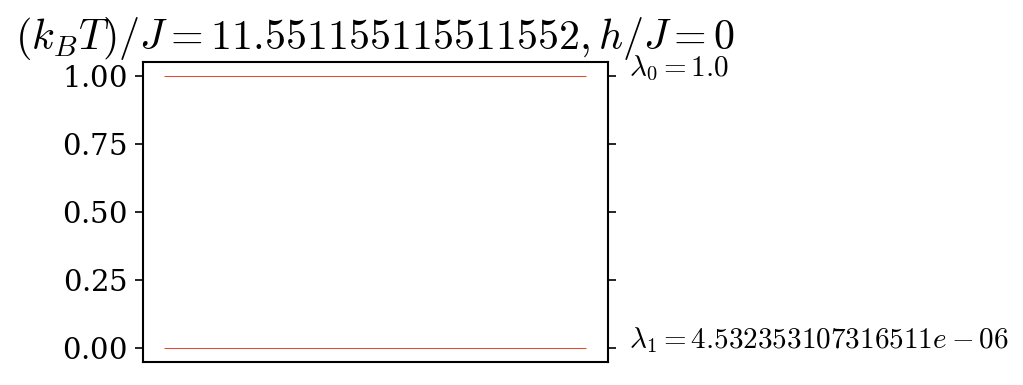

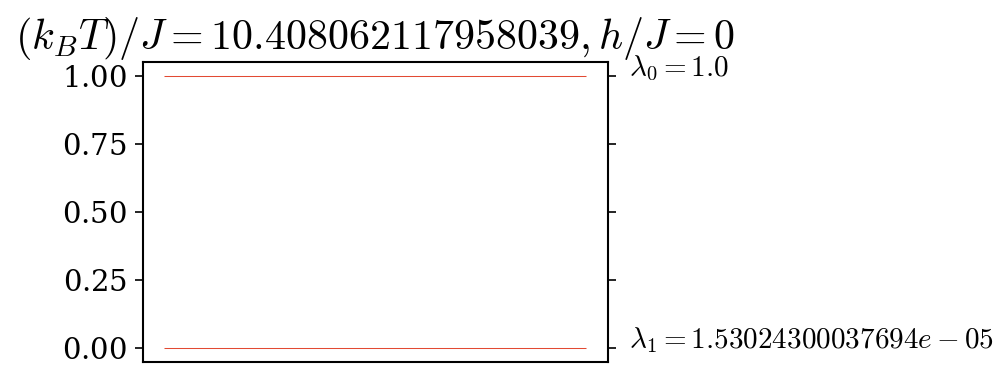

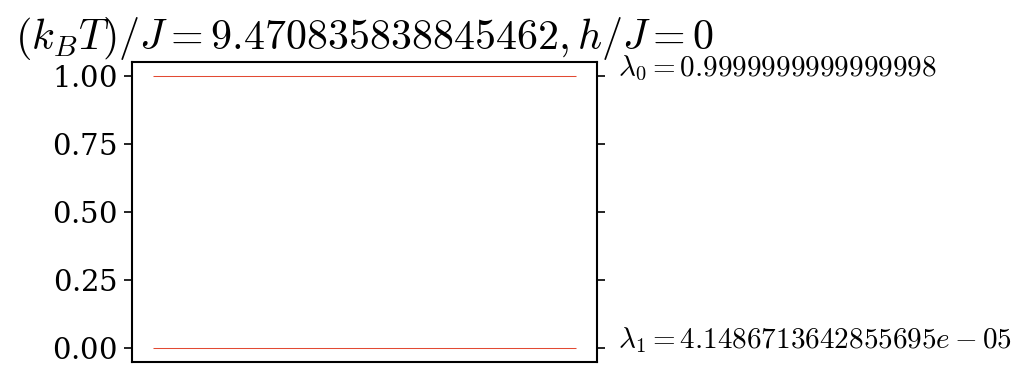

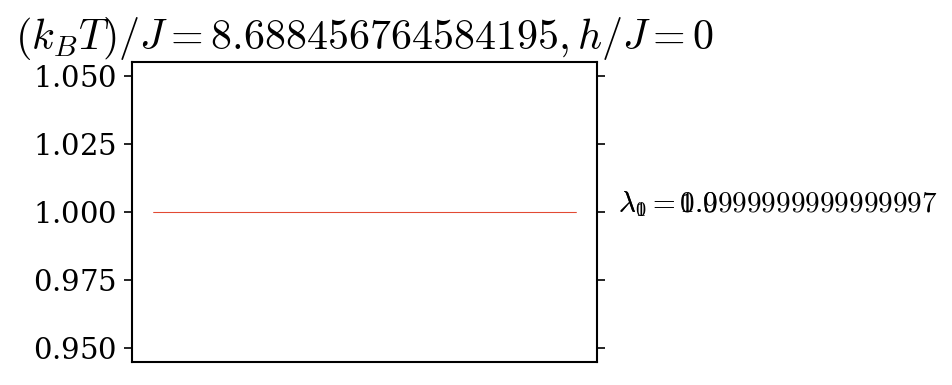

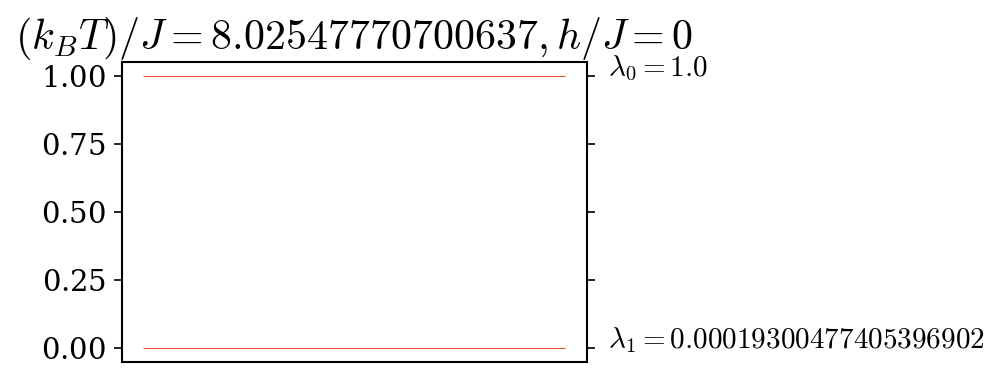

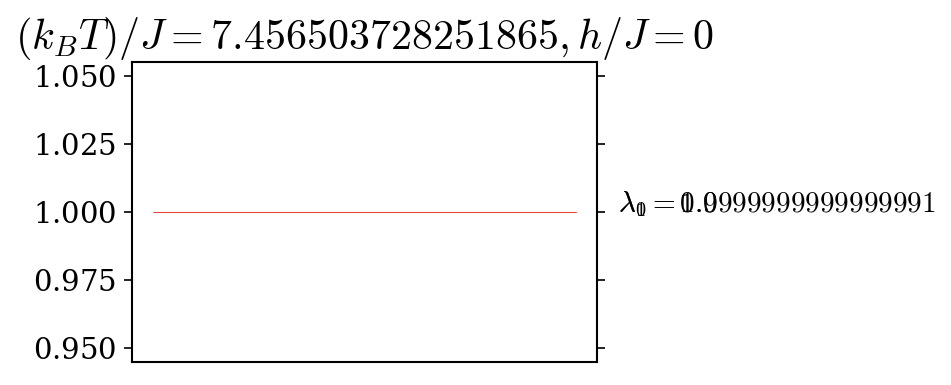

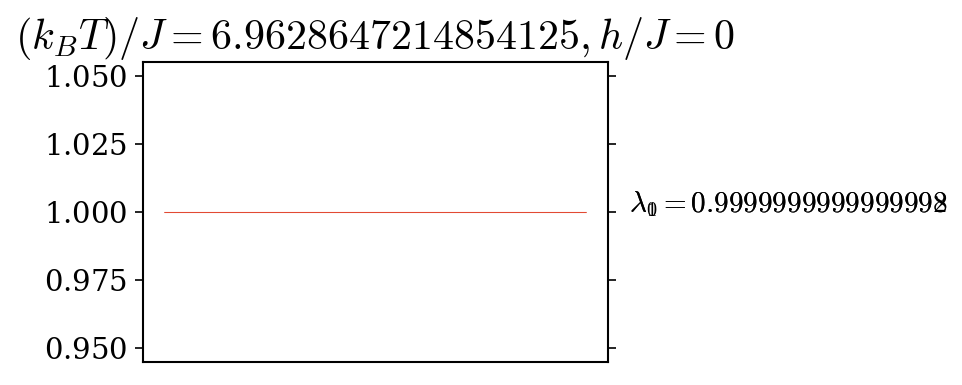

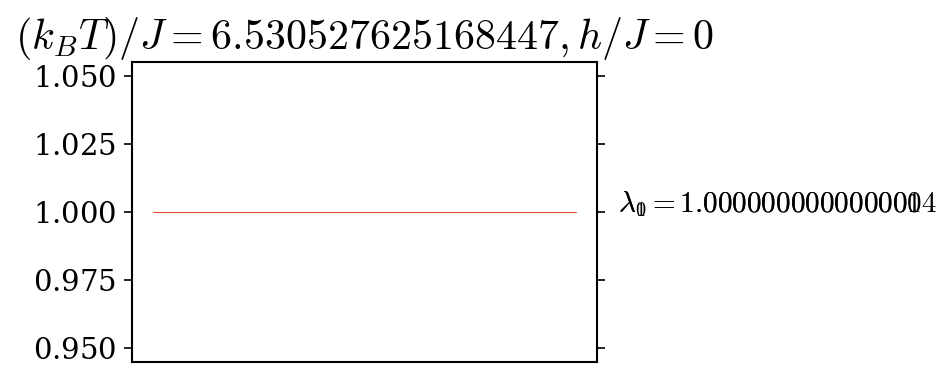

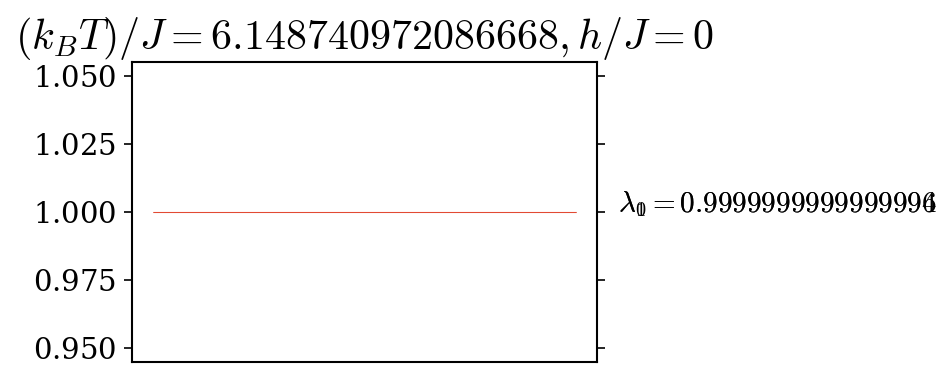

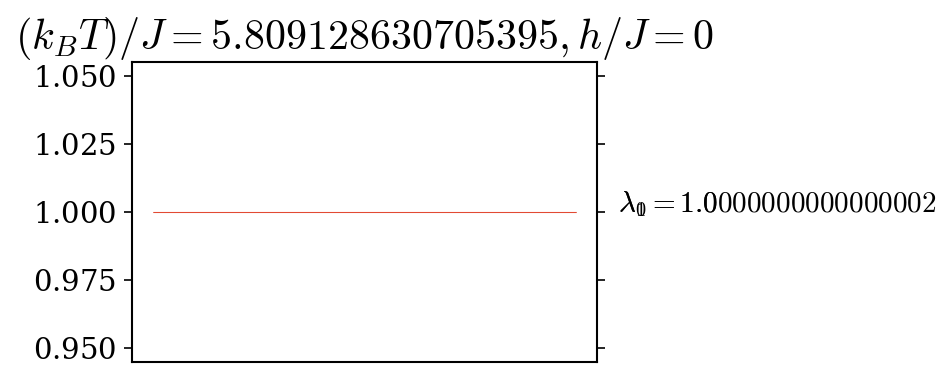

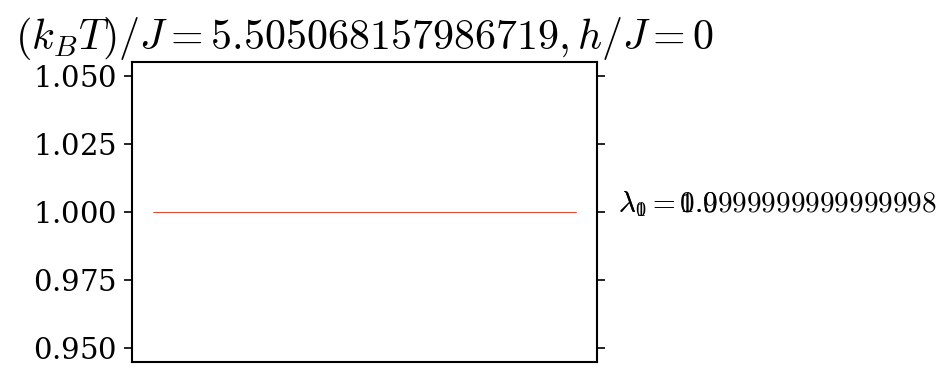

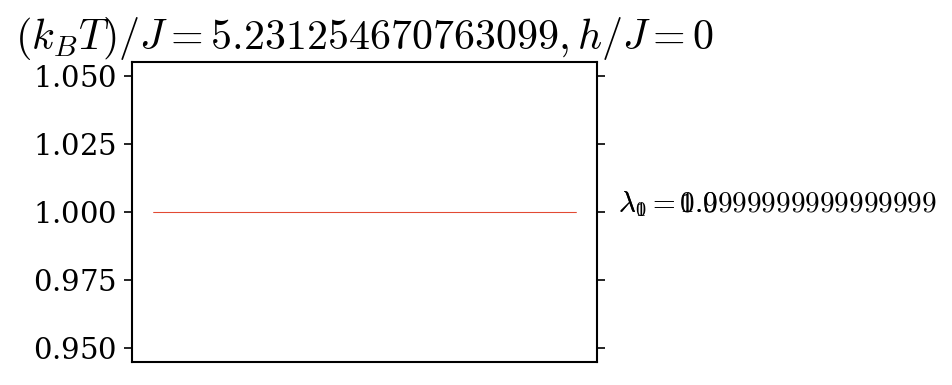

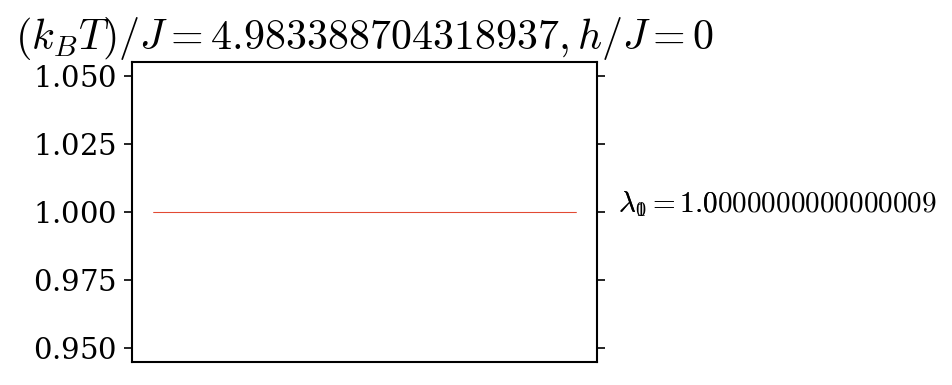

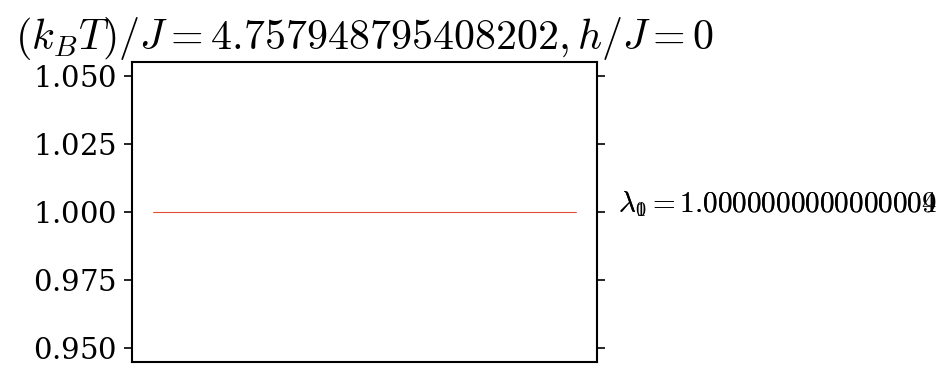

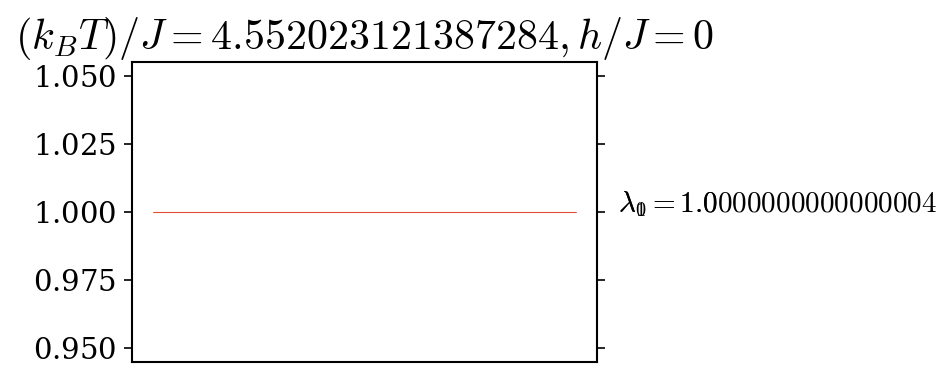

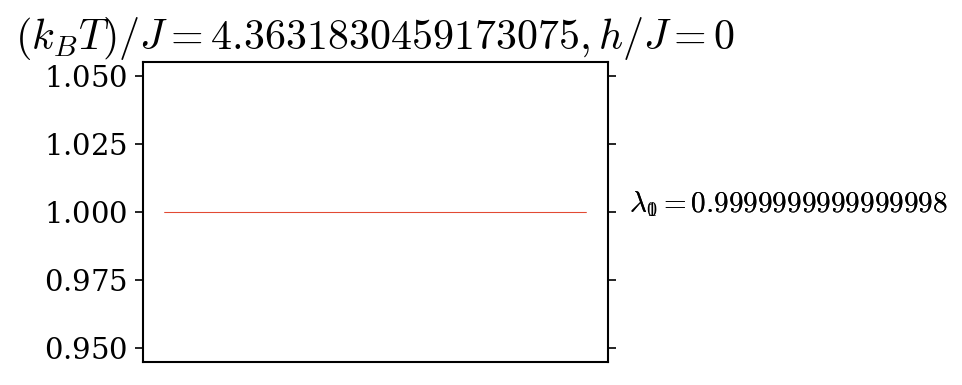

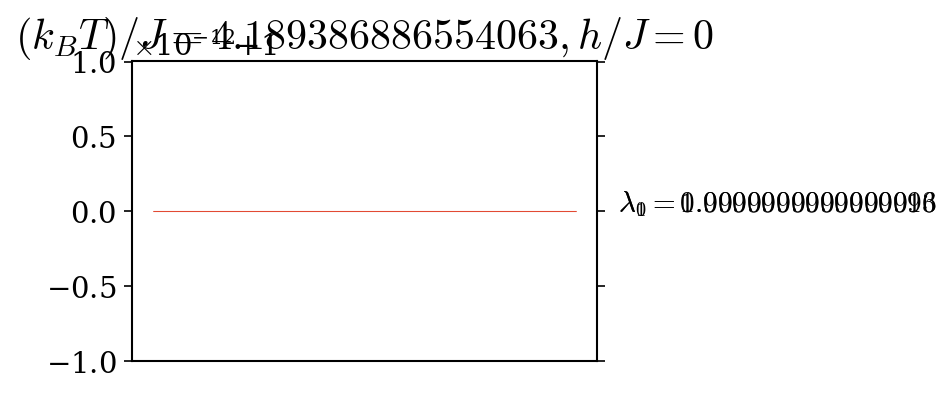

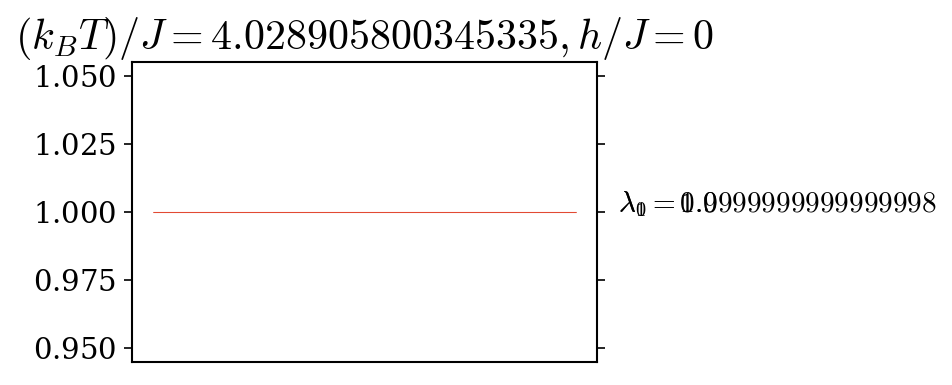

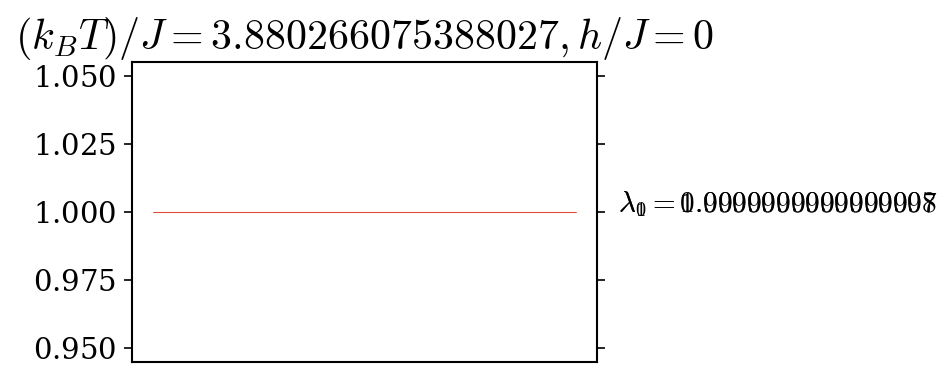

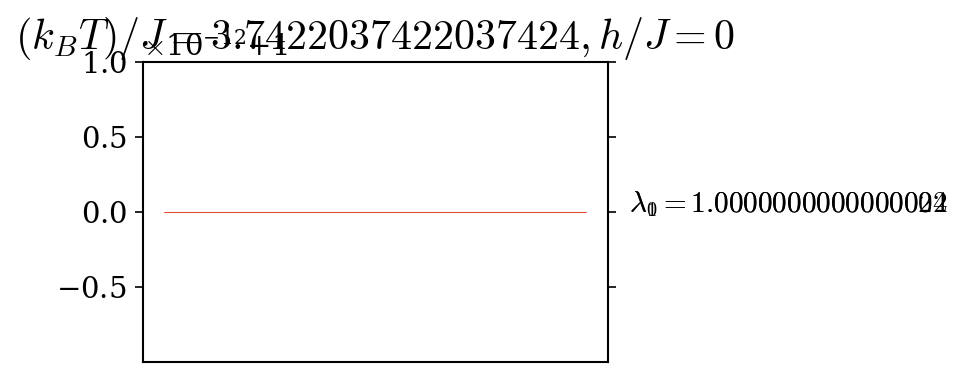

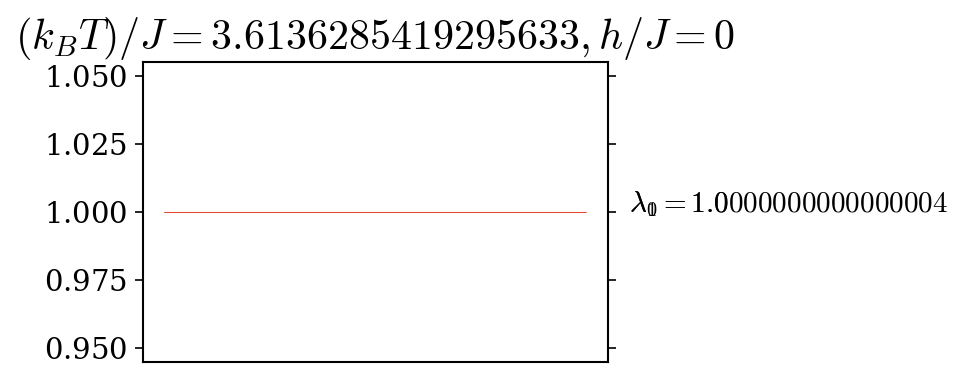

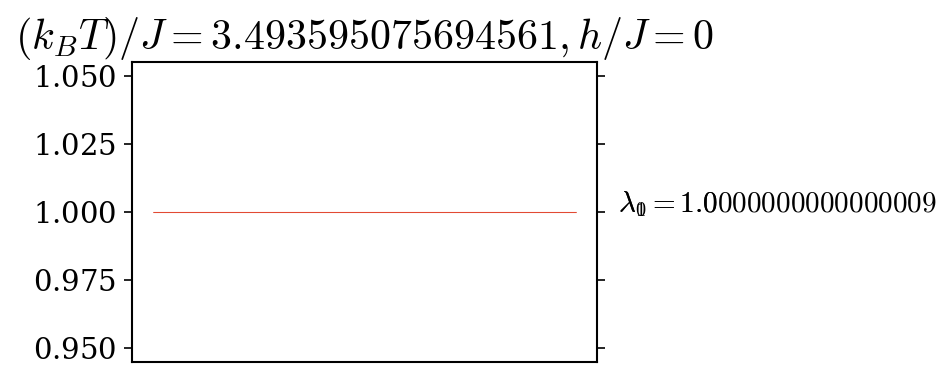

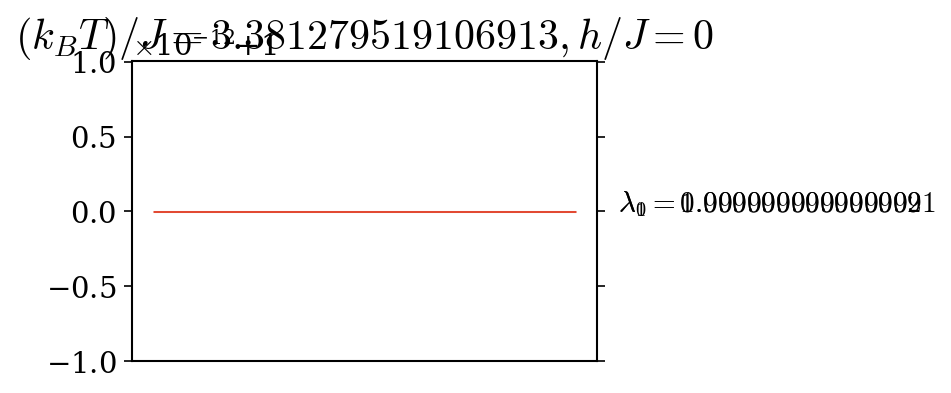

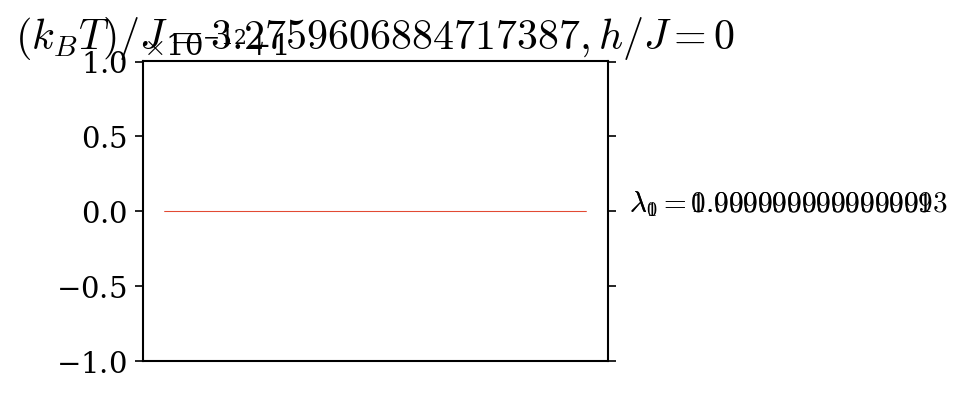

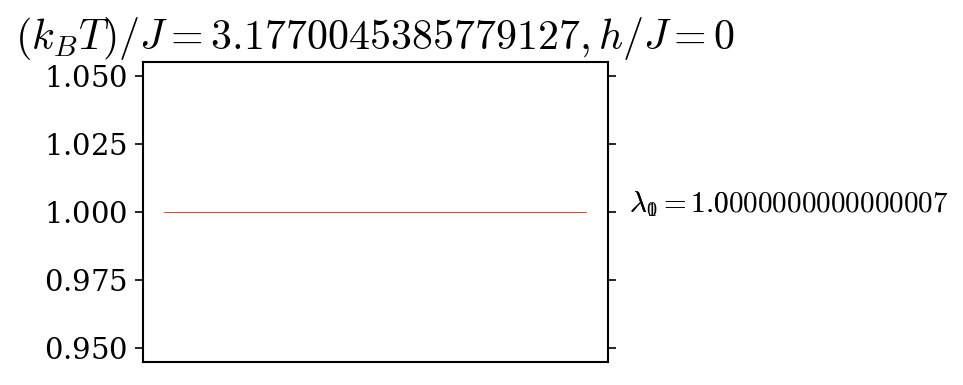

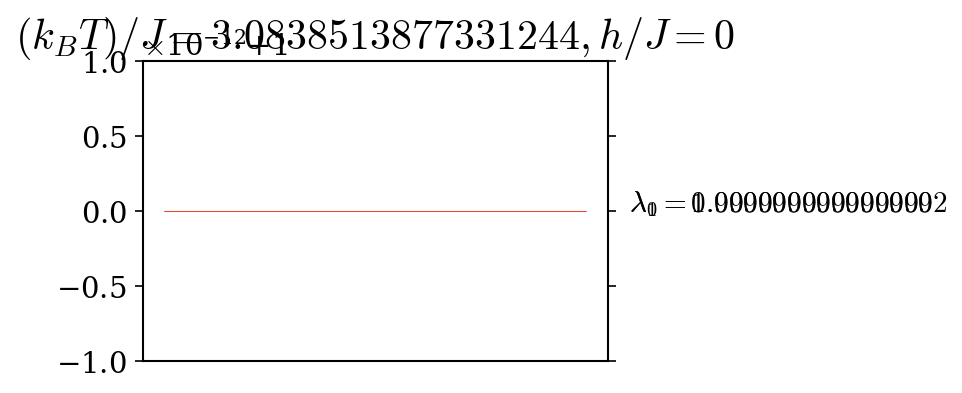

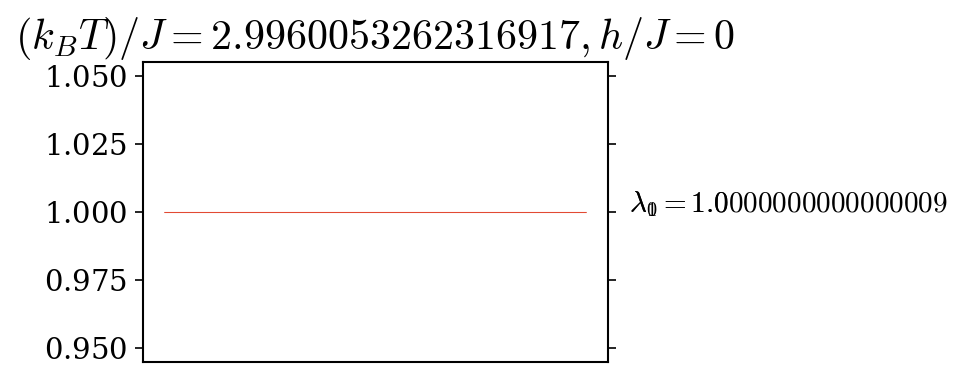

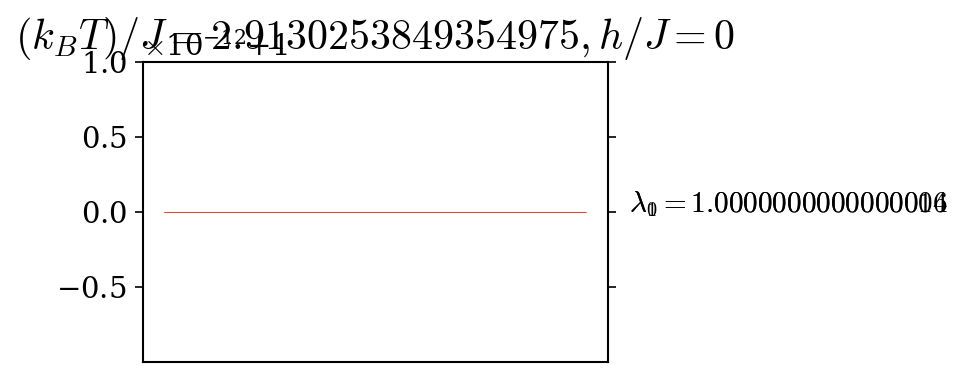

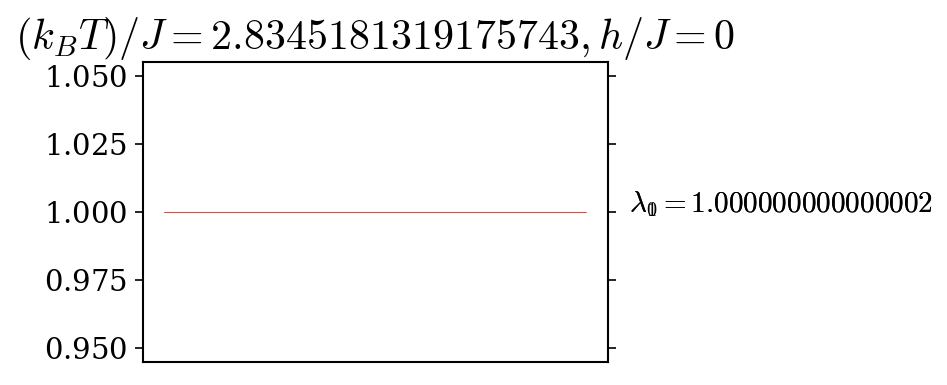

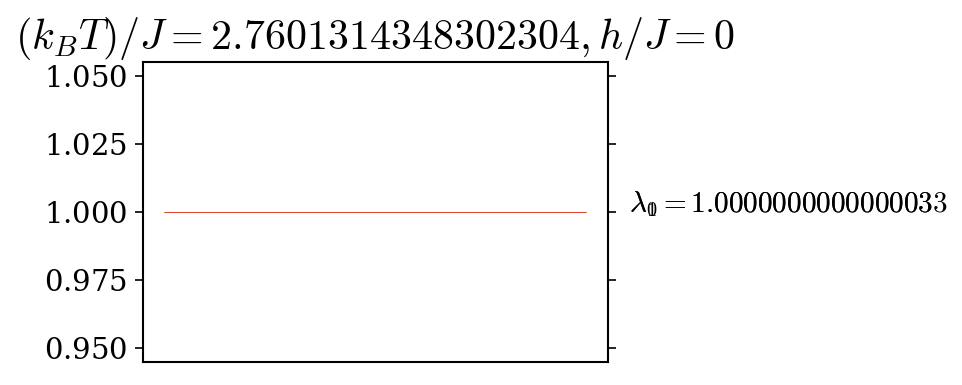

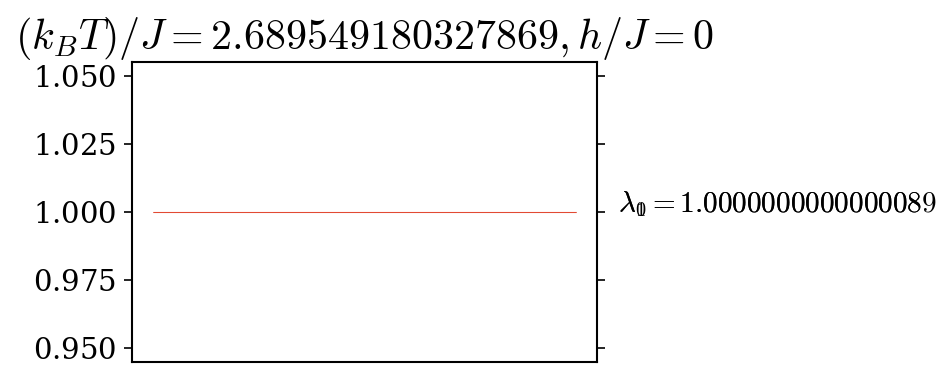

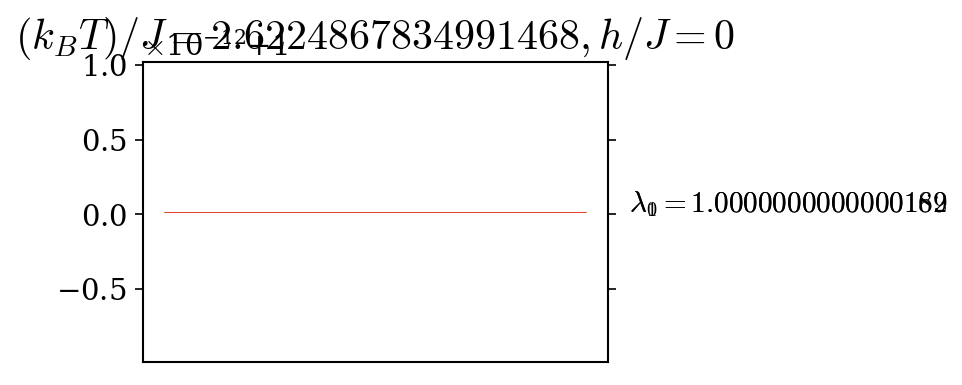

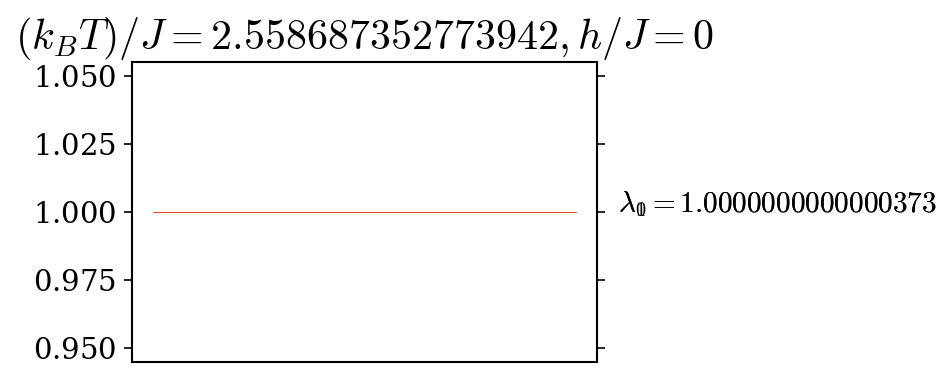

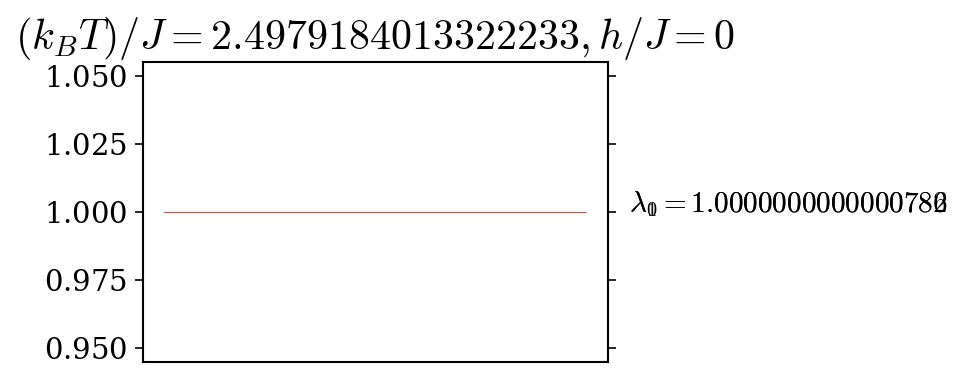

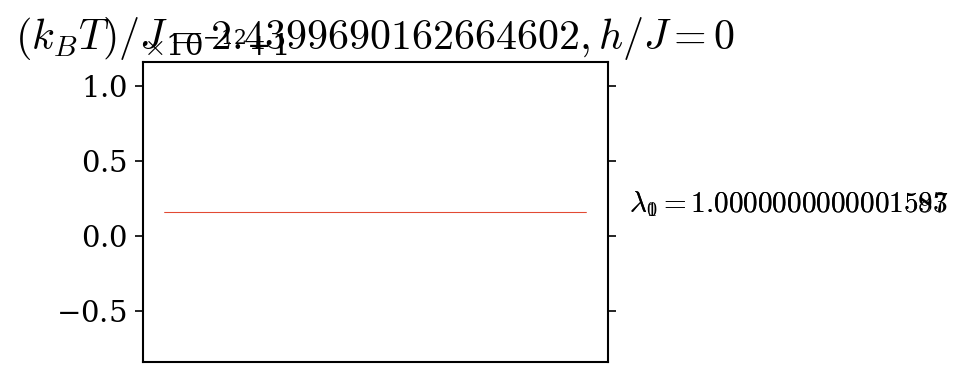

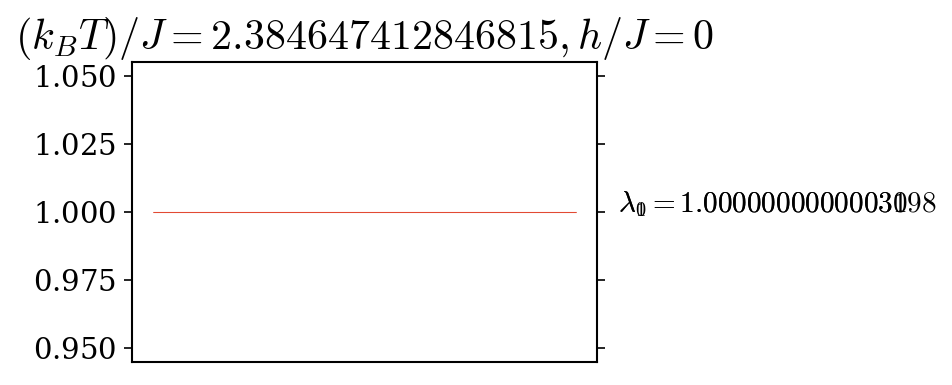

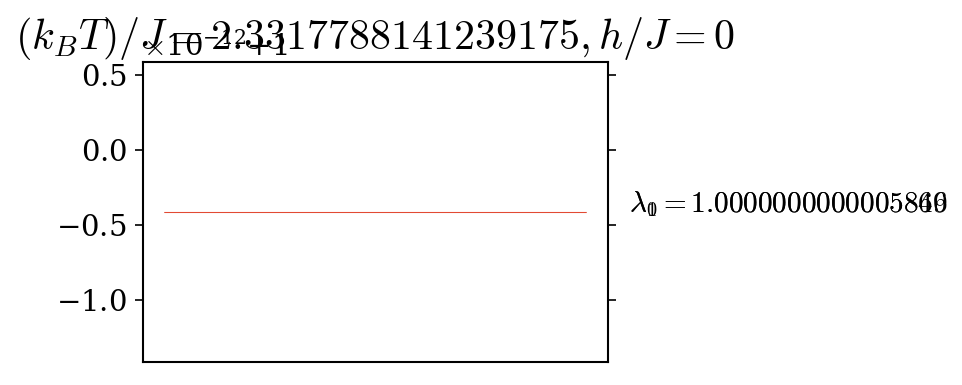

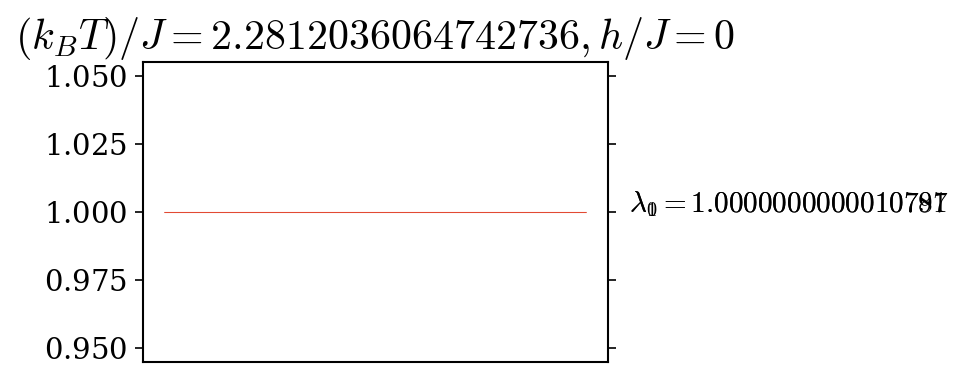

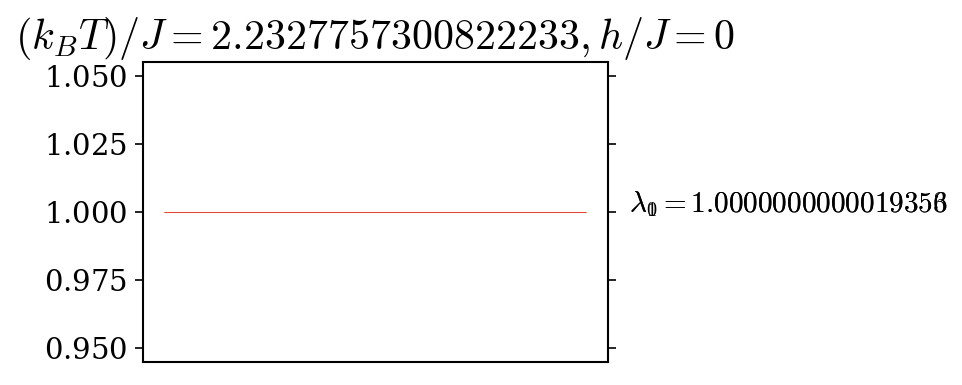

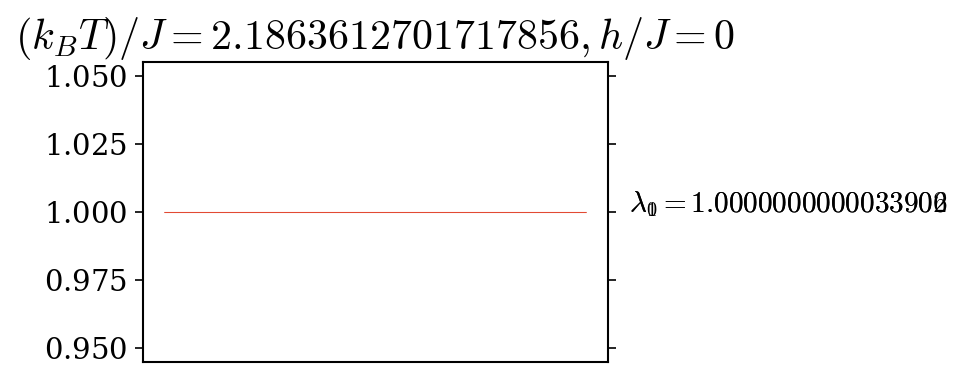

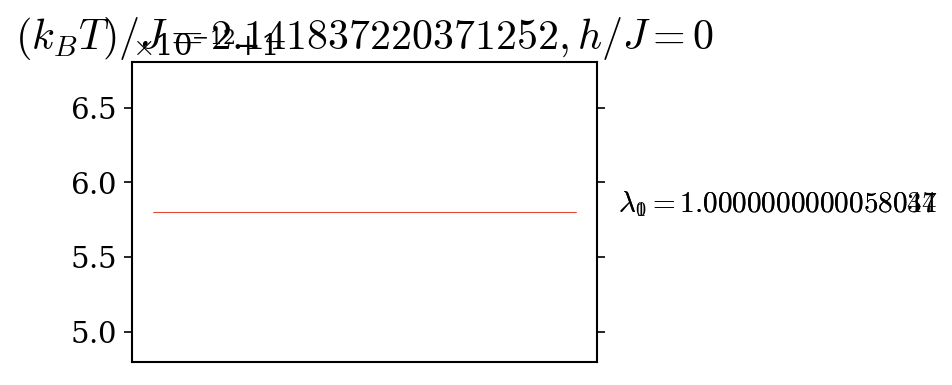

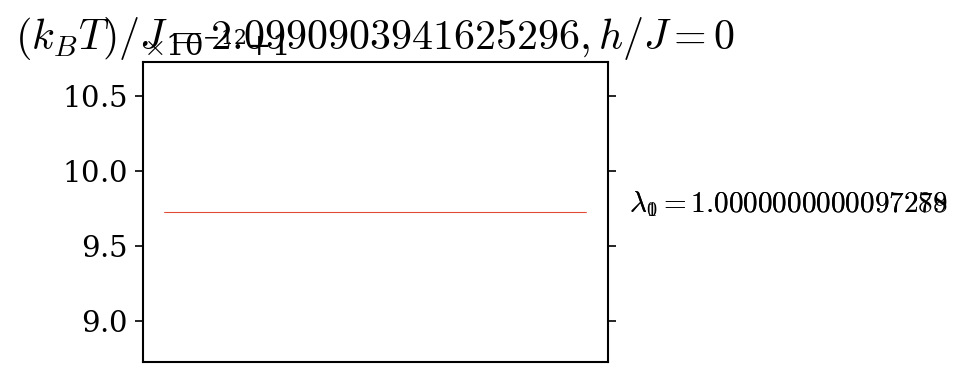

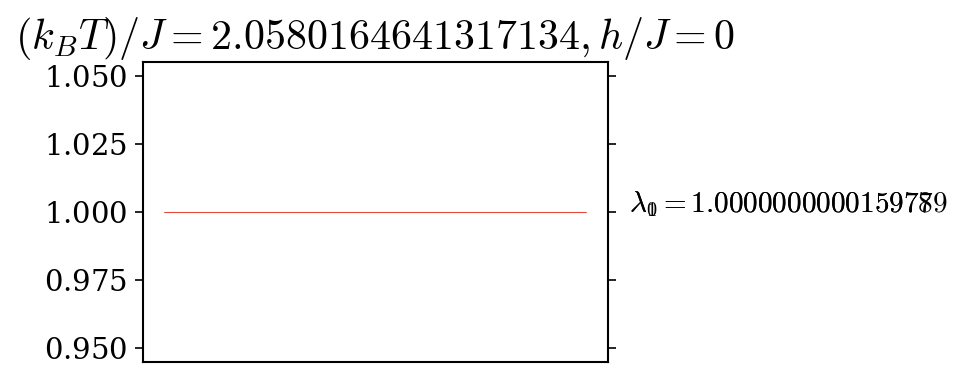

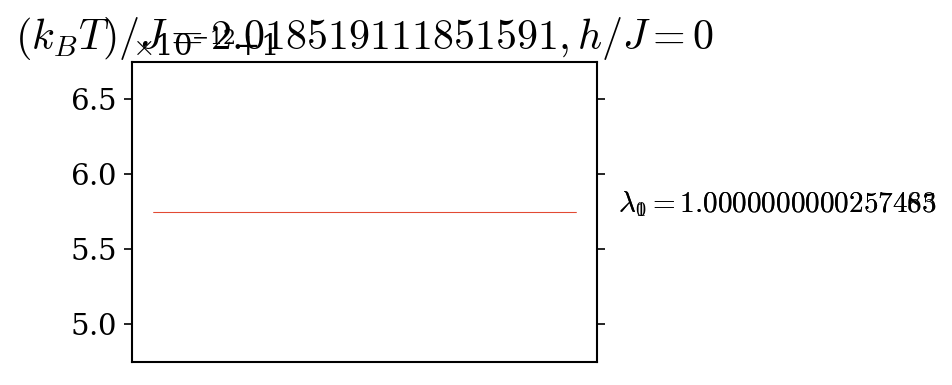

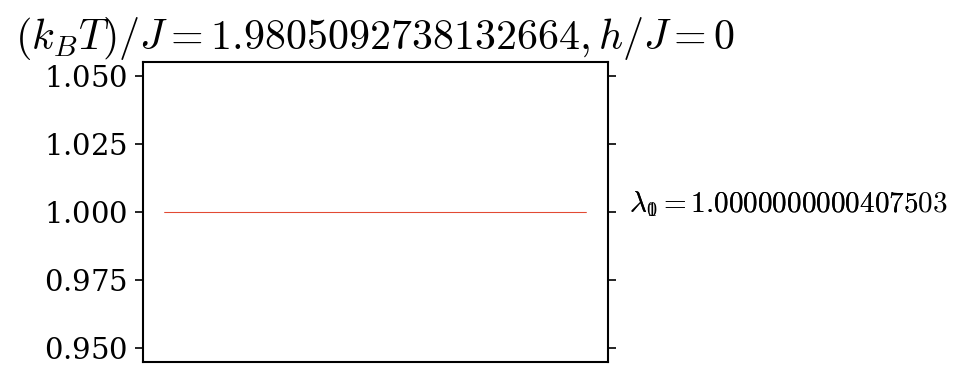

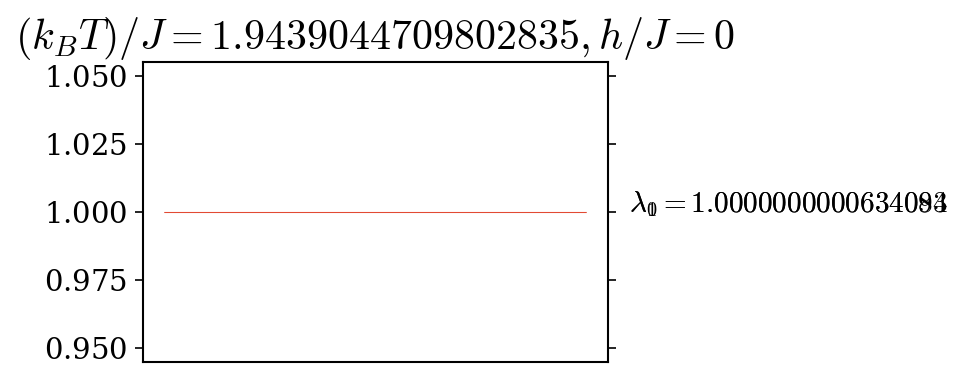

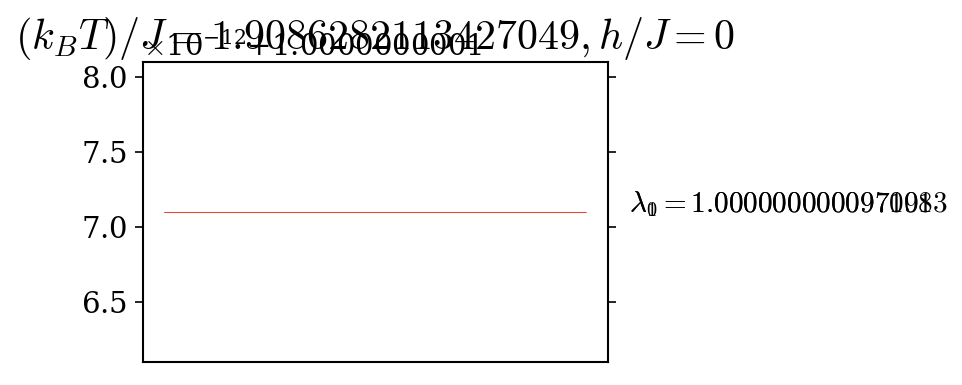

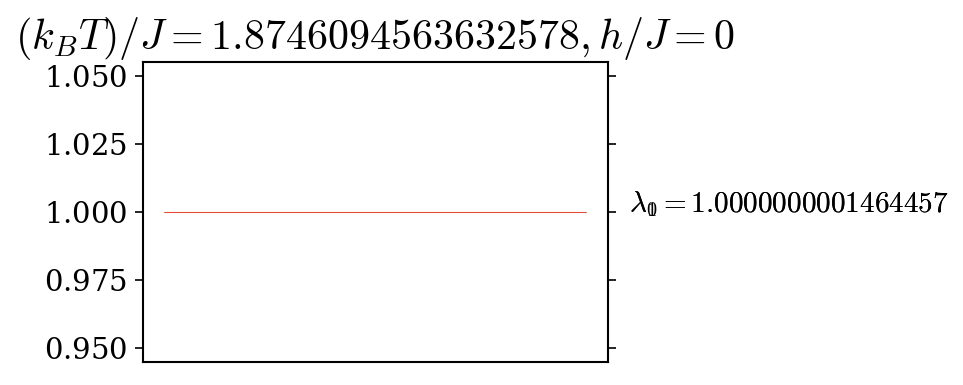

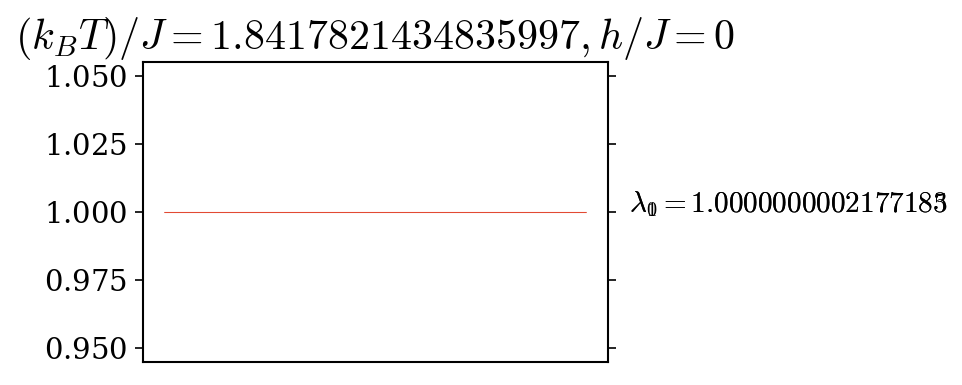

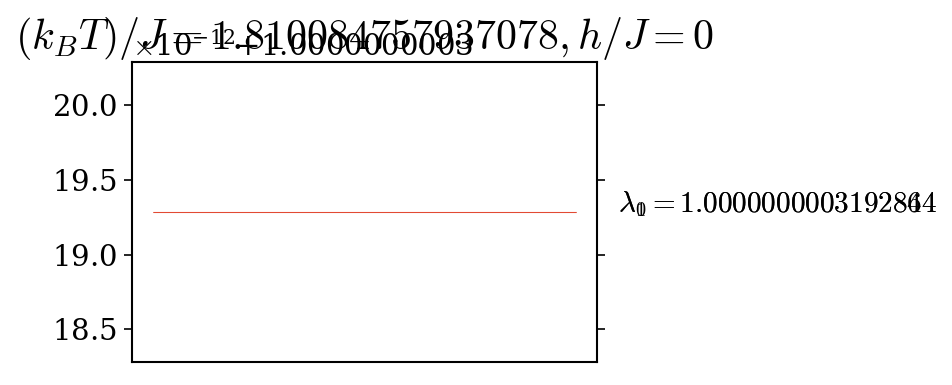

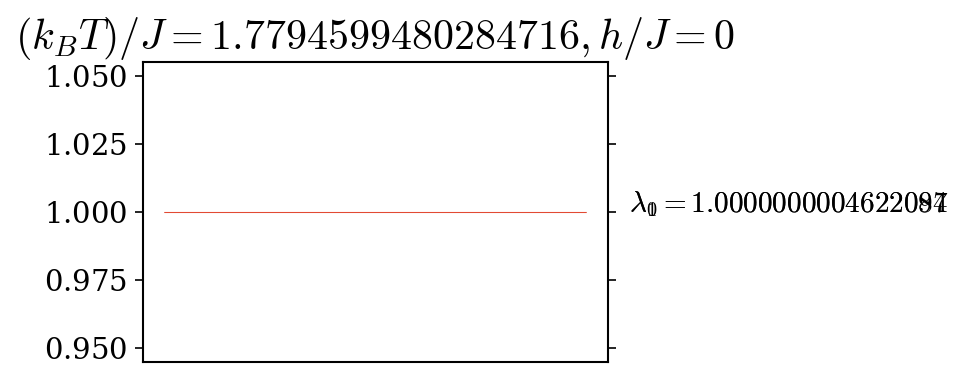

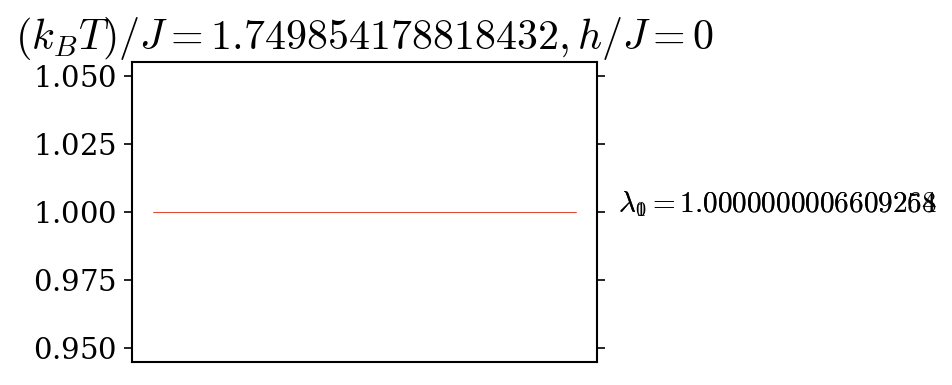

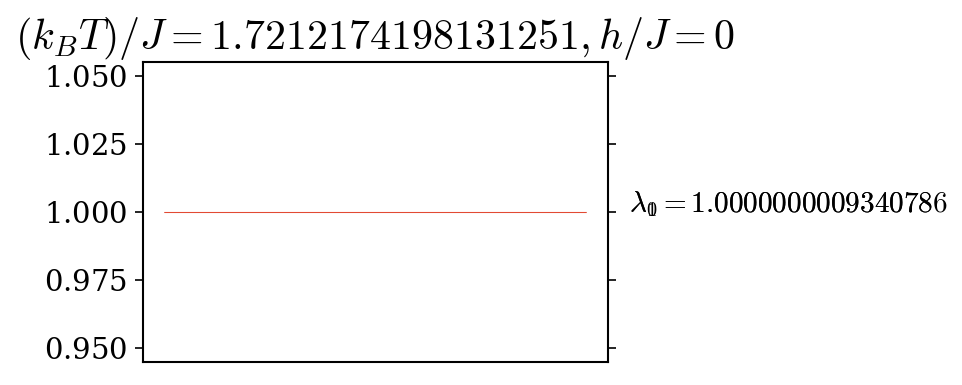

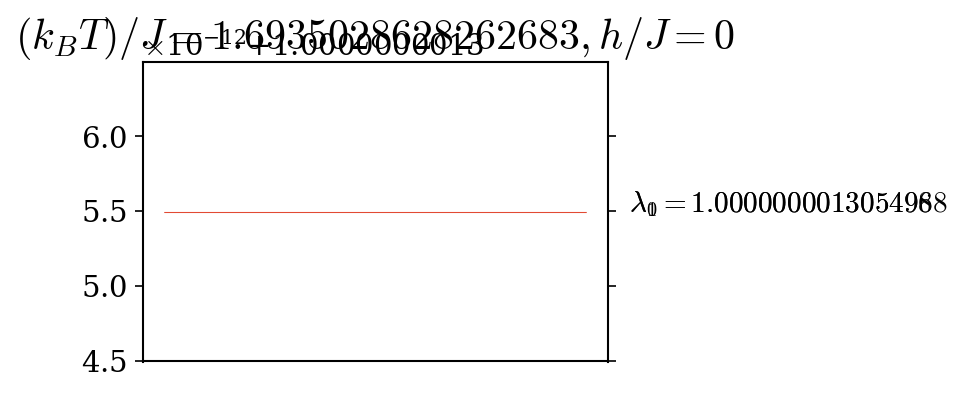

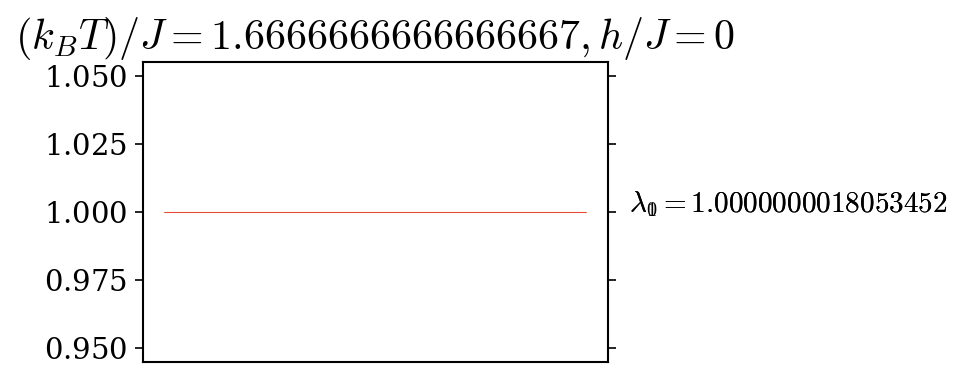

In [20]:
# ind = len(temp)-1
for ind in range(len(temp)):
    use_tex = False

    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = use_tex

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    count = 0
    for ind_lam,lambda_value in enumerate(abs(data_eigenvalues[:,0][ind])):
        # Specific heat subplot.
        ax: Axes = fig1.add_subplot(grid_spec[0, 0])

        ax.hlines(y=abs(lambda_value),
                  xmin=0,
                  xmax=1,
                  lw=0.5)
        ax.annotate(r"$\lambda_{}={}$".format(ind_lam,lambda_value),
          xy     = (     1, lambda_value),
          xytext = (1.1, lambda_value)
        )
        ax.set_title(r"$(k_BT)/J={}, h/J=0$".format(1/temp[ind]))

        #clean xticks
        ax.set_xticklabels([])
        ax.set_xticks([])
    #     ax.text(1.1, 1.3, 
    #         s=r"$k_BT/J={}$".format(temp[ind]))
    #     ax.text(1.1, 1.1, 
    #         s=r"$h/J=0$")
        count += 1
        if count >=2:
            break

## With centrosymmetric

In [7]:
p=1.0
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\eigens\\regular\\infinite-size\\centrosym\\p_{}'.format(p)).resolve()
file = 'p-{}_nv-2_h-0_eig-2.yml'.format(p)
# data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\test').resolve()
# file = 'p-2.0_nv-3_h-0.yml'.format(p)
config_file = Path(os.path.join(data_path,file)).resolve()
eigens_file = config_file.with_suffix(".eigenvalues.h5")
# eigens_file = config_file.with_suffix(".free-energy.h5")
with h5py.File(eigens_file) as h5fp:
    data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
#     pprint(h5fp['eigens'].keys())
#     pprint(h5fp['eigens']['max-w-matrix'][:])
#     pprint(h5fp['eigens']['eigenvalues'][:])
#     pprint(h5fp['eigens']['eigenvectors'][:])
with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)
temp = config_data["system"]["temperature"]
mag_field = config_data["system"]["magnetic_field"]

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


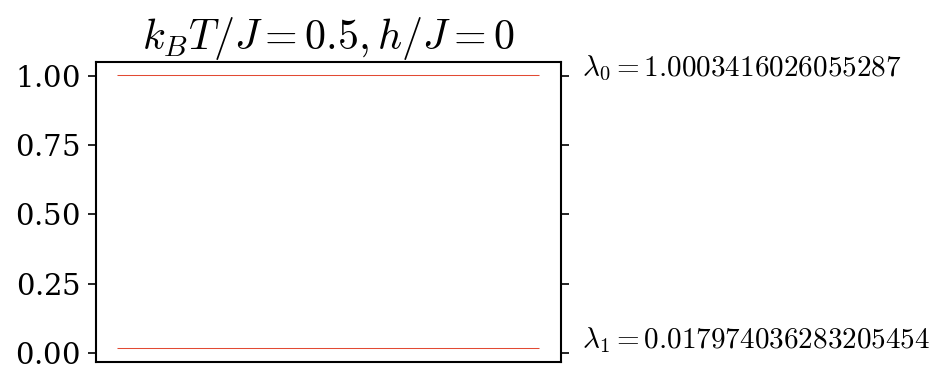

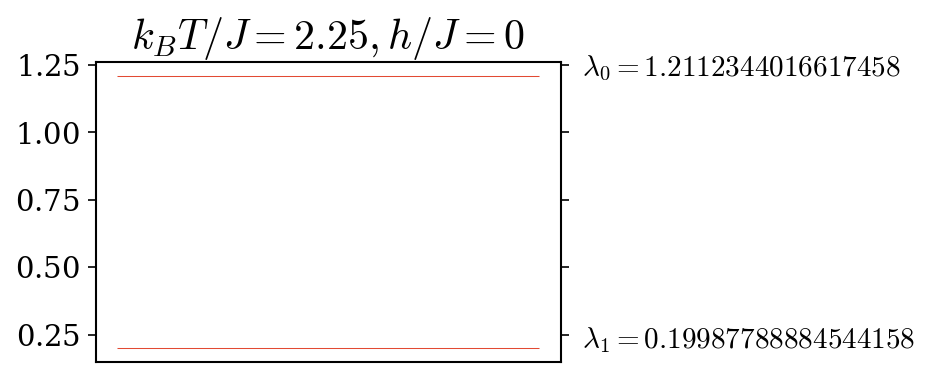

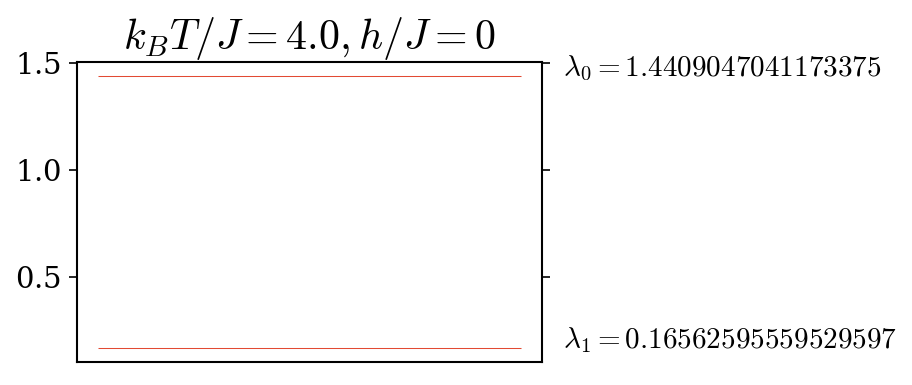

In [9]:
for ind in range(len(temp)):
    use_tex = False

    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = use_tex

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    for ind_lam,lambda_value in enumerate(abs(data_eigenvalues[:,0][ind])):
        # Specific heat subplot.
        ax: Axes = fig1.add_subplot(grid_spec[0, 0])

        ax.hlines(y=abs(lambda_value),
                  xmin=0,
                  xmax=1,
                  lw=0.5)
        ax.annotate(r"$\lambda_{}={}$".format(ind_lam,lambda_value),
          xy     = (     1, lambda_value),
          xytext = (1.1, lambda_value)
        )
        ax.set_title(r"$k_BT/J={}, h/J=0$".format(temp[ind]))
        
        #clean xticks
        ax.set_xticklabels([])
        ax.set_xticks([])
#     ax.text(1.1, 1.3, 
#         s=r"$k_BT/J={}$".format(temp[ind]))
#     ax.text(1.1, 1.1, 
#         s=r"$h/J=0$")

Los eigenvalores de la matriz centrosymetrica resultante resultan ser el más grande y el más pequeño en magnitud para el caso nv=2. Por tanto se tendrá que realizar el calculo de la segunda matriz centrosymetrica para poder encontrar tanto la función de correlación como la longitud de correlación

In [14]:
p=1.0
data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\eigens\\regular\\infinite-size\\centrosym\\p_{}'.format(p)).resolve()
file = 'p-{}_nv-2_h-0_eig-4.yml'.format(p)
# data_path = Path('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\isingchat\\data\\test').resolve()
# file = 'p-2.0_nv-3_h-0.yml'.format(p)
config_file = Path(os.path.join(data_path,file)).resolve()
eigens_file = config_file.with_suffix(".eigenvalues.h5")
# eigens_file = config_file.with_suffix(".free-energy.h5")
with h5py.File(eigens_file) as h5fp:
    data_eigenvalues = h5fp['eigens']['eigenvalues'][:]
#     pprint(h5fp['eigens'].keys())
#     pprint(h5fp['eigens']['max-w-matrix'][:])
#     pprint(h5fp['eigens']['eigenvalues'][:])
#     pprint(h5fp['eigens']['eigenvectors'][:])
with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)
temp = config_data["system"]["temperature"]
mag_field = config_data["system"]["magnetic_field"]

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


[1.0003416  0.01797404 0.99967046 0.0179861 ]
[1.2112344  0.19987789 0.86785135 0.27896364]
[1.4409047  0.16562596 0.72338042 0.32991108]


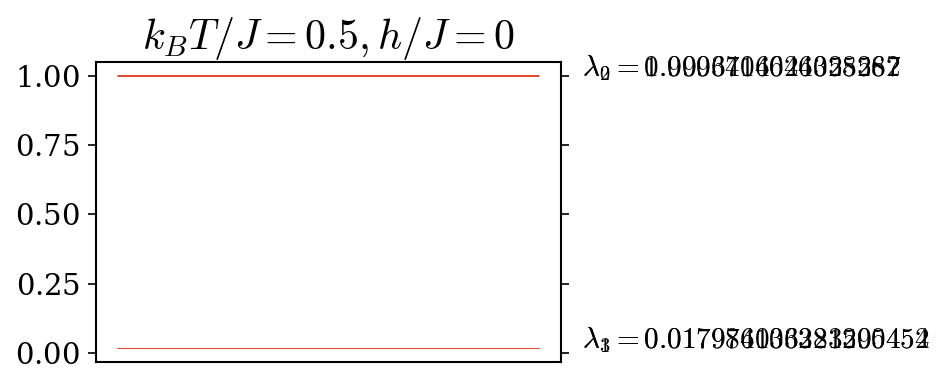

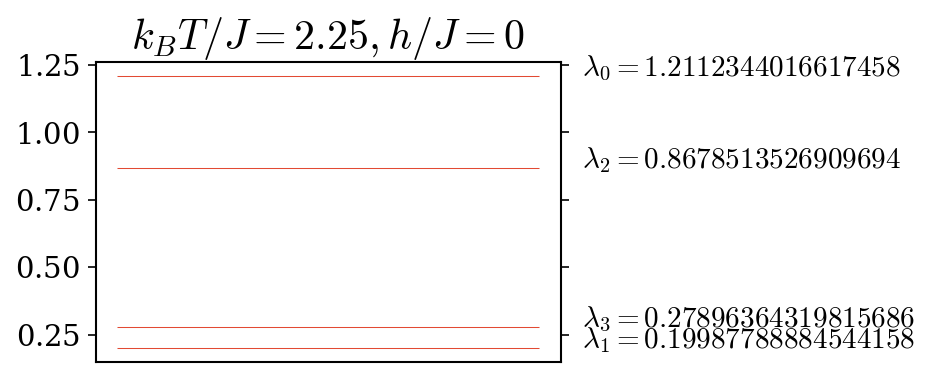

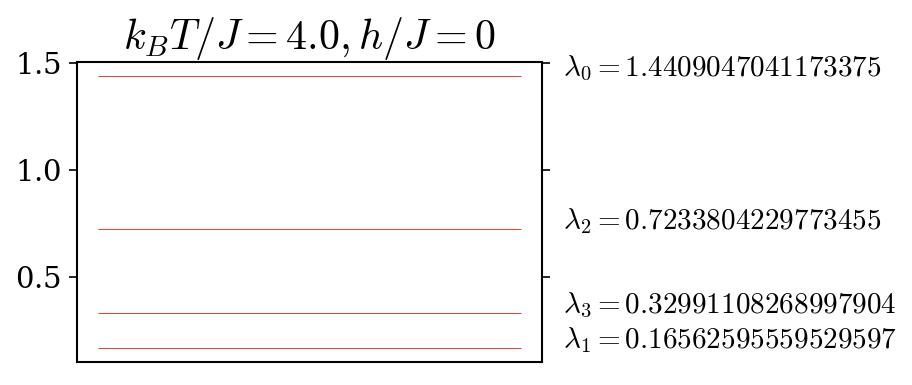

In [15]:
for ind in range(len(temp)):
    use_tex = False

    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = use_tex

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    for ind_lam,lambda_value in enumerate(abs(data_eigenvalues[:,0][ind])):
        # Specific heat subplot.
        ax: Axes = fig1.add_subplot(grid_spec[0, 0])

        ax.hlines(y=abs(lambda_value),
                  xmin=0,
                  xmax=1,
                  lw=0.5)
        ax.annotate(r"$\lambda_{}={}$".format(ind_lam,lambda_value),
          xy     = (     1, lambda_value),
          xytext = (1.1, lambda_value)
        )
        ax.set_title(r"$k_BT/J={}, h/J=0$".format(temp[ind]))
        
        #clean xticks
        ax.set_xticklabels([])
        ax.set_xticks([])
    print(abs(data_eigenvalues[:,0][ind]))
#     ax.text(1.1, 1.3, 
#         s=r"$k_BT/J={}$".format(temp[ind]))
#     ax.text(1.1, 1.1, 
#         s=r"$h/J=0$")